<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/ArbolBinarioOptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arbol Binario de Busqueda Optimo**

Árbol binario de busqueda optimo, consistirá en realizar a partir de una secuencia ordenada de de n palabras construir un árbol binario con estas palabras.

Donde tendremos que:



> **Secuencia de palabras: $ K = <k1, k2, ..., kn>$**


```
IMPORTANTE:

k1 < k2 < .. < kn

```


> **Claves ficticias:** Es probable, que algunas palabras buscadas no se encuentren en K, por lo que tendremos n + 1, **claves ficticias** o **pseudo palabras** $d0, d1, d2,..., dn$, estos representan búsquedas fallidas, dado que representan palabras que no están en K.




```
d0 : representa todos los valores menores a k1
dn: representa todos los valores mayores que kn.
```

**Probabilidades :**

Cada clave ki y di tiene su probabilidad de ser buscada y la suma de esto debe ser 1.


> Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada.


>  Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada.


$\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$



Este problema se clasifica como uno de ***optimización*** , debido que el objetivo principal que encontraremos es ***minimizar*** el costo esperado, el cual es la cantidad promedio de nodos visitados.

Para calcular el costo esperado será: la sumatoria de todos los nodos, donde será $p_i$, la probabilidad de ser buscado por $c_i$, que será el costo de el nodo actual. Para saber el valor de $ci$ = h + 1, donde h será su altura. 


$\sum\limits_{i=1}^n p_i * c_i + \sum\limits_{j=0}^n q_i * c_i$



> **Importante:** En la sumatoria de p_i * c_i, la altura calculada en c_i es la altura del nodo ki. Y en la sumatoria de q_i * c_i, la altura de c_i la altura, es del nodo d_i.


## **Paso a Paso: Arbol binario de búsqueda optimo.**

Se verán dos técnicas para resolver este algoritmo, de forma recursiva y con programación dinamica (Bottom-up).

### **Bottom-up**

La programación dinámica, se enfoca en dividir el problema original en subproblemas, irlos resolviendo y a su vez guardando este dato.

La **entrada**, será el conjunto de datos ordenados "K", el arreglo con las probabilidades de cada dato , el arreglo que contiene las prob de las "claves ficticias" y el tamaño de el conjunto de datos K.

El **tamaño**, será la cantidad de elementos que contiene este conjunto.

Los pasos que seguirá esta técnica para resolver el problema serán:



1.   Primero creamos 3 matrices, la que contendrá los costos mínimos calculados "costoEsperado", la matriz que contendra la suma de las  probabilidades "prob" y la matriz que contendrá la raíz optima de los subárboles que se irán analizando, "root".
2.  Inicializamos las matrices "costoEsperado" y "prob" en 0 y luego rellenamos la diagonal con los valores ingresados en el arreglo "q", es decir, el que contiene las probabilidades de las claves ficticias. 

3.  Para cada subarbol que se irá evaluando, se calcularán el costo y este se almacenará en la matriz "costoEsperado", para calcular este costo:



> $costoEsperado[i][j] = prob[i][j] + costoEsperado(izq) + costoEsperado(derecha)$

> donde, izq = (i, r - 1) y der = (r + 1, j) y r, corresponde a la raíz del subárbol evaluado.

En el caso que estemos evaluando mas de 1 raíz(por ejemplo si estamos en costoEsperado[2,4], se evalua el costo de la raiz 2, 3 y 4), se calcula la cantidad de veces como raices a evaluar y se almacena el menor costo de estas raíces y guardamos en "root" la raíz que minimiza el costo.


4. Al finalizar de rellenar estas matrices, estarán nuestras matrices optimizadas, de manera que podemos construir nuestro árbol de búsqueda óptimo.



### **Recursivo**

Este método, no guarda la resolución de los sub-problemas, sino que se llama recursivamente hasta encontrar el costo mínimo y finalizar la ejecución.

La **entrada**, contiene los mismos arreglos que el método mencionado anteriormente y le agregamos los índices de inicio y fin de el arreglo que contiene nuestra secuencia de datos, es decir, si nuestro arreglo contiene 5 elementos, le pasamos el índice 0 y 4, debido que al ser recursivo estos datos se irán actualizando en la evolución del código y así se calculará de manera correcta el costo mínimo.


1. Caso Base: si nuestro final, es menor a nuestro inicial, es nuestro caso base y retornamos el valor que contiene nuestro arreglo de probabilidades de claves ficticias en la posición (ini - 1)

2. Calculamos la suma de las probabilidades tanto para el arreglo "p" como el arreglo "q" y ambas sumas las almacenamos en "prob":
$\sum\limits_{i - 1}^j p_i + \sum\limits_{i-1}^{j-1}q_i$

3. Inicializamos el costo mínimo, con un número muy grande, será la variable "costoMinimo"

4. Por cada raíz que este en el rango de nuestro inicio hasta nuestro final, llamamos recursivamente nuestra función tanto para el lado izquierdo, donde nuestro inicio será "i" y nuestro final será la (raíz actual - 1) y el lado derecho, tendrá: el inicio como (raíz actual + 1)  el final será "j" y esto se hará hasta el caso base.

5. Calculamos el costo mínimo del arból que contiene la raíz "r", este se calcula como:

$ cost = costIzq + costDer + prob $

6. Analizamos si el costo calculado es menor "costoMinimo", de ser así almacenamos su nuevo valor

7. Finalmente, siempre iremos almacenando el costo mínimo en las llamadas recursivas, de forma que cuando finalice nuestra ejecución habremos encontrado el costo esperado.







## **Bottom-up**

In [ ]:
import numpy as np
from math import inf
def arbolbottom(k, p, q,  cont, largo, verbose):

  #matriz que guarda costos mínimos
  costoEsperado = np.zeros((largo + 2, largo + 1))
  #matriz que almacena la suma de probabilidades
  prob = np.zeros((largo + 2, largo + 1))
  #matriz que guarda las raíces optimas
  root = np.zeros((largo + 1, largo + 1))

  #inicializacion de diagonal
  for i in range(1, largo + 2):
    costoEsperado[i][i-1] = q[i-1]
    prob[i][i-1] = q[i-1]

#proceso de calculo de costo esperado
  for i in range (1, largo + 1):
    for j in range (1, largo - i + 2):
        #nuevo sub-problema
        cont[0] +=1
        #variable que nos permite recorrer las matrices
        k = i + j - 1
        #inicializamos el costo del nodo en infinito, dado que buscamos el minimo
        costoEsperado[j][k] = inf
        #calculamos la suma de las prob hasta el nodo actual
        prob[j][k] = prob[j][k-1] + p[k - 1] + q[k]
        
        #dependiendo cuantas raices tengamos, veemos cual contiene el mín costo
        if(verbose == True):
          print("Costo esperado en la posición i:",j,"j:",k,"\n")
        for  r in range(j,k + 1):
          izq = r - 1
          der = r + 1
          cost  = costoEsperado[j][izq] + costoEsperado[der][k] + prob[j][k]
          if(verbose == True):
            print("Raiz a evaluar:", r)
            print("Costo de la raíz:", cost, "\n")
          if cost  < costoEsperado[j][k] :
            costoEsperado[j][k] = cost
            root[j][k] = r
        if(verbose == True):
          print("Raíz optima: ", root[j][k])  
          print("Costo mínimo", costoEsperado[j][k],"\n\n")

          
    

  return costoEsperado, cont



k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
largo = len(k)
cont = [0]
costoEsperado, cont = arbolbottom(k,p, q, cont, largo, verbose = False)
costoMin = costoEsperado[1][5]
print("Costo esperado:", costoMin)
print("Cantidad de sub-problemas:", cont[0])

Costo esperado: 2.75
Cantidad de sub-problemas: 15


### Ejemplo paso a paso BOTTOM-UP

***Entrada:***

k = [1, 2, 3, 4, 5]

p = [0.15, 0.10, 0.05, 0.10, 0.20]

q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]

***Tamaño:*** 5

En este ejemplo, se mostrará paso a paso como se van calculando los costos mínimos para poder ingresarlos en su matriz correspondiente

In [ ]:
k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
largo = len(k)
cont = [0]
costoEsperado, cont = arbolbottom(k,p, q, cont, largo, verbose = True)

Costo esperado en la posición i: 1 j: 1 

Raiz a evaluar: 1
Costo de la raíz: 0.45000000000000007 

Raíz optima:  1.0
Costo mínimo 0.45000000000000007 


Costo esperado en la posición i: 2 j: 2 

Raiz a evaluar: 2
Costo de la raíz: 0.4 

Raíz optima:  2.0
Costo mínimo 0.4 


Costo esperado en la posición i: 3 j: 3 

Raiz a evaluar: 3
Costo de la raíz: 0.25 

Raíz optima:  3.0
Costo mínimo 0.25 


Costo esperado en la posición i: 4 j: 4 

Raiz a evaluar: 4
Costo de la raíz: 0.30000000000000004 

Raíz optima:  4.0
Costo mínimo 0.30000000000000004 


Costo esperado en la posición i: 5 j: 5 

Raiz a evaluar: 5
Costo de la raíz: 0.5 

Raíz optima:  5.0
Costo mínimo 0.5 


Costo esperado en la posición i: 1 j: 2 

Raiz a evaluar: 1
Costo de la raíz: 0.9 

Raiz a evaluar: 2
Costo de la raíz: 0.9500000000000002 

Raíz optima:  1.0
Costo mínimo 0.9 


Costo esperado en la posición i: 2 j: 3 

Raiz a evaluar: 2
Costo de la raíz: 0.7 

Raiz a evaluar: 3
Costo de la raíz: 0.8 

Raíz optima:  2.0
C

##**Recursivo**

In [ ]:
def arbolRecursivo(k,p, q, cont, ini , fin):
  cont[0]+=1
  
  #caso base
  if(ini > fin): return q[ini-1]

  
  sumprobK = sum(p[ini - 1: fin])
  sumprobD = sum(q[ini - 1: fin + 1])
  prob = sumprobD + sumprobK


  cost = inf

  for r in range(ini, fin + 1):
    costIzq = arbolRecursivo(k,p,q,cont,ini, r - 1)
    costDer = arbolRecursivo(k,p,q,cont,r + 1, fin)
    cost2 = costIzq + costDer + prob
    
    if(cost2 < cost ):
      cost = cost2
 


  return cost


k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
cont = [0]
costoEsperado = arbolRecursivo(k,p, q, cont, 1 , len(k))
print("Costo Esperado:", costoEsperado)
print("Cantidad llamadas recursivas:", cont[0])

Costo Esperado: 2.75
Cantidad llamadas recursivas: 243


## **Tiempo de Ejecución**



**Bottom-Up**

El tiempo de ejecución es $n^3$ para demostrarlo debemos entender que la solución de cada sub problema al igual que el algoritmo visto antes matrix chain es $O(n^2)$ y cada vez que queremos encontrar el sub problema seria $O(n)$




Ahora si reunimos los datos que tenemos y resolvemos nos quedaría $O(n^3)$

Para construir la formula necesitamos
*   El costo de resolver cada sub-problema y la cantidad
*   lo que cuesta encontrar el sub problema




Tiene una complejidad espacial $n^2$ debido a que debe guardar datos en una matriz de tamaño n x n, pero solo la mitad de la matriz, lo que se reduce a $(n^2)/(2)$ asi podemos demostrar que su complejidad espacial es $n^2$.

##**Correctitud**



Para demostrar el que el algoritmo bottom-up es correcto, debemos calcular el costo mínimo, lo que nos llevara una búsqueda bastante exhaustiva de todas las posibilidades, para eso etiquetamos los nodos de ***k_1,k_2...k_n *** para crear el árbol binario y agregarle las claves ficticias, esta búsqueda de árbol binario con n nodos tendíamos que examinar un número exponencial de árboles, por lo que es normal que debamos resolver este problema con programación dinámica.

**Sub estructura óptima**

Para la sub estructura optima debemos considerar que cualquier sub árbol **$k_i...k_j $** debemos saber que se debe cumplir que **$1 <= i <= j <= n$**, donde los sub arboles deben contener claves ficticias **$di-1,....dj$**

Ahora sabemos que el árbol binario de búsqueda óptimo **T** tiene sub árboles que contienen las claves **$k_i...k_j $** con sus respectivas claves ficticias **$d_i-1,....d_j$** podemos decir que $k_r (i <=  r <= j)$ es sub raíz de una sub árbol óptimo que contiene todas las claves 

El subárbol izquierdo contendría todas la clave k_r  **$k_i...k_r-1 $** y **$di-1,....dr-1$** y el sub árbol derecho contiene **$k_r+1...k_j $**.

Al examinar todos los candidatos $k_r$ y aseguraríamos que encontramos árbol binario de búsqueda óptimo mientras $i<= r <= j$


**Definir una función recurrente**

para definir nuestra función recurrente debemos saber nuestro dominio de subproblema que contenga las claves **$k_i...k_j $** cuando **$1 <= i <= j <= n$**. Ahora podemos definir e[i,j] que es el costo esperado 







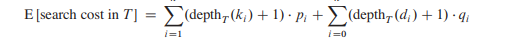

La manera de calcular la suma de las probabilidades para cada sub árbol seria:

$w[i,j] = \sum_{l=i}^{j}p_l + \sum_{l=i-1}^{j}q_l$

De esta manera tenemos que en el caso de que $K_r$ es una raíz de un árbol binario de búsqueda óptimo **$k_i...k_j $** tenemos que:

$e[i,j] = p_r + (e[i,r-1]+w(i,r-1))+(e[r+1,j]+w(r+1,j))$

ahora podemos notar que:

$w(i,j)=w(i,r-1) + p_r + w(r+1,j)$

ahora que notamos como queda $w(i,j)$ podemos reescribir $e[i,j]$

$e[i,j] = e[i,r-1] + e[r+1,j]+ w(i,j)$

La fórmula recursiva nos quedaría así:



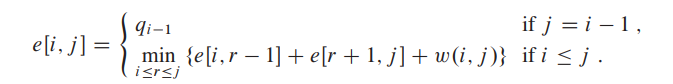

**Demostrando la correctitud**

Al inicio de nuestro algoritmo las matriz e[] contendrá los mínimos obtenidos en cada iteración de l...n, para lograr calcular el costo mínimo.

Inicialización:

Al principio se crean y se inicializa la diagonal de la matriz e[] que contiene la suma de los costos mínimos, esto siempre será correcto porque aún no tenemos sub problemas


Mantención:

Durante la ejecución se sumarán las probabilidades para cada raíz $k_0...K_n$ y se calculara el costo mínimo, esto es correcto porque se irán guardando solo los mínimos calculados en la matriz e[].


Finalización: 

Por último vamos a tener la solución del problema final gracias este paradigma de programación dinámica 


##**Experimentos**

### **Arból de busqueda Optimo: Recursivo v/s Bottom-Up**.

En este experimento, se evaluará el tiempo de ejecución de las dos algoritmos que estudiamos anteriormente, para ver cual es más eficiente.

En esta oportunidad, se ocupará una funcion especifica que nos retornará los arreglos "keys" que contiende la secuencia de datos ordenados, "p" que contiene las propabilidades de k y "q" que contiene las probabilidades de las claves ficticias.



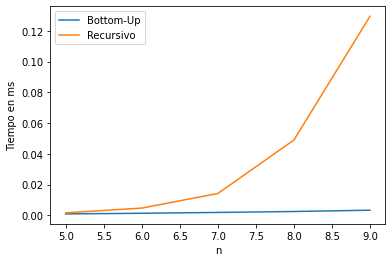

In [ ]:
import random
import numpy as np
from timeit import repeat
import matplotlib.pyplot as plt

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)


x=[]; y1=[]; y2=[];

for n in range(5,10):
  keys, p, q = optimal_bst_instance_generator(n)
  cont = [0]
  cont2 = [0]
  verbose = False
  t1= repeat(setup="from __main__ import arbolbottom", stmt=f"arbolbottom({keys},{p},{q.tolist()},{cont},{len(keys)},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import arbolRecursivo", stmt=f"arbolRecursivo({keys},{p},{q.tolist()},{cont},{1},{len(keys)})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up", "Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Resultados:** Como podemos ver, a pesar que Bottom-Up requiere de memoria para ir guardando los datos de los subproblemas, es mucho más eficiente que el método recursivo, debido que este se llama asi mismo muchas veces y al ir guardando los resultados de los subproblemas en el caso de Bottom-Up lo hace un proceso mucho más rápido.